Left-handed and right-handed coupling of quarks to Z boson
$$ g^{Z\rightarrow q \bar{q}} = \frac{| e | (T_3 - Q \sin^{2} \theta_{W})}{\sin \theta_{W} \cos \theta_{W}}$$,
where 

$e=0.30282212$ (elementry charge in natural units),

$T_3=0$ for right-handed quarks, $T_3=1/2$ for left-handed up quark, $T_3=-1/2$ for left-handed down, 

$Q=2/3$ for up quark, $Q=-1/3$ for down quark,

$\sin^2 \theta_W=1-(m_W/m_Z)^2=0.222$ (Weinberg mixing angle),

$\cos \theta_W=\frac{m_W}{m_Z}=0.882$.

[Weinberg mixing angle](https://www2.ph.ed.ac.uk/~playfer/PPlect16.pdf)

[elementry charge](https://www.hep.phy.cam.ac.uk/~chpotter/particleandnuclearphysics/Lecture_09_Weak.pdf)

[Hypercharge](http://www.particles.uni-freiburg.de/dateien/vorlesungsdateien/hadroncolliderss15/kapitel6)

In [3]:
gZddLeft = 0.30282212 * (-0.5+1/3*0.222) / Sqrt[0.222] / 0.882

-0.310422

In [4]:
gZddRight = 0.30282212 * (1/3*0.222) / Sqrt[0.222] / 0.882

0.053923

Left-handed and right-handed coupling of leptons to Z boson
$$ g^{Z\rightarrow \ell \bar{\ell}} = \frac{| e | (T_3 + \sin^2 \theta_W)}{\sin \theta_W \cos \theta_W}$$
where 

$e=0.30282212$ (elementry charge in natural units),

$T_3=0$ for right-handed leptons, $T_3=-1/2$ for left-handed leptons,


$\sin^2 \theta_W=1-(m_W/m_Z)^2=0.222$ (Weinberg mixing angle),

$\cos \theta_W=\frac{m_W}{m_Z}=0.882$.


In [5]:
gZllLeft = 0.30282212 * (-0.5+0.222) / Sqrt[0.222] / 0.882

-0.202576

In [6]:
gZllRight = 0.30282212 * (0.222) / Sqrt[0.222] / 0.882

0.161769

For $Z \gamma$, the production angular distribution is
$$ \frac{1}{N}\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi} = (g^{2}_{\text{rh lep}}+g^{2}_{\text{lh lep}})(g^{2}_{\text{rh qua}}+g^{2}_{\text{lh qua}})\mathcal{G}_1)+(g^{2}_{\text{rh lep}}-g^{2}_{\text{lh lep}})(g^{2}_{\text{rh qua}}-g^{2}_{\text{rh qua}})\mathcal{G}_2$$

$$ \mathcal{G}_1 = [ (m_{\ell\ell}^{4} + \hat{s}^2) (3+\cos2\theta) (4\csc^2\Theta -2 ) + 8 m_{\ell\ell}^2 \hat{s} \sin^2\theta (2+\cos2\phi) + 8 m_{\ell\ell}\sqrt{\hat{s}}(m^2_{\ell\ell}+\hat{s})\cot\Theta\sin2\theta\cos\phi ]$$

$$ \mathcal{G}_2 = 16 \csc\Theta [(m^4_{\ell\ell} + \hat{s}^2) \cos\theta \cot \Theta + m_{\ell\ell}\sqrt{\hat{s}} (m^2_{\ell\ell} + \hat{s}) \sin \theta \cos \phi ] $$

In [7]:
mZ = 91.1876

91.1876

In [113]:
s=125^2

15625

In [114]:
G1 = ( (mZ^4+s^2)*(3+Cos[2*th])*(4*Csc[lTh]^2-2) + 8*mZ^2*s*Sin[th]^2*(2+Cos[2*ph]) + 8*mZ*Sqrt[s]*(mZ^2+s)*Cot[lTh]*Sin[2*th]*Cos[ph])

8                                 2             9                        2
3.13283 10  (3 + Cos[2 th]) (-2 + 4 Csc[lTh] ) + 1.0394 10  (2 + Cos[2 ph]) Sin[th]  + 
 
              9
>   2.18305 10  Cos[ph] Cot[lTh] Sin[2 th]

In [115]:
G2 = 16 * Csc[lTh] * ( (mZ^4+s^2)*Cos[th]*Cot[lTh] + mZ*Sqrt[s]*(mZ^2+s)*Sin[th]*Cos[ph] )

8                              8
16 Csc[lTh] (3.13283 10  Cos[th] Cot[lTh] + 2.72881 10  Cos[ph] Sin[th])

8                              8
0.0222311 Csc[lTh] (3.13283 10  Cos[th] Cot[lTh] + 2.72881 10  Cos[ph] Sin[th]) + 
 
                          8                                 2
>   0.00667151 (3.13283 10  (3 + Cos[2 th]) (-2 + 4 Csc[lTh] ) + 
 
                9                        2             9
>      1.0394 10  (2 + Cos[2 ph]) Sin[th]  + 2.18305 10  Cos[ph] Cot[lTh] Sin[2 th])
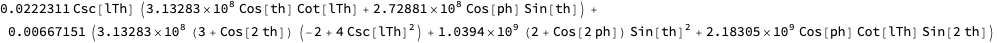

In [116]:
diffS = (gZllRight^2 + gZllLeft^2)*(gZddRight^2+gZddLeft^2)*G1+(gZllRight^2 - gZllLeft^2)*(gZddRight^2-gZddLeft^2)*G2

Integrate over $\Theta$ and $\theta$ to get $\phi$ distribution. 

Limit $\cos \Theta$ integration to range of $-1 + 0.03$ to $1 - 0.03$ due to singularity at $\cos \Theta=0$ and $\cos \Theta=\pi$.

In [117]:
intth = Integrate[diffS,{th,0,Pi}]

7             7                       7
-1.7612 10  + 1.08925 10  Cos[2 ph] + 1.21329 10  Cos[ph] Csc[lTh] + 
 
              7         2
>   7.87938 10  Csc[lTh]

7             7
          7   7.87938 10    1.21329 10  Cos[ph]             7
-1.7612 10  + ----------- + ------------------- + 1.08925 10  Cos[2 ph]
                       2                   2
               1 - clTh       Sqrt[1 - clTh ]
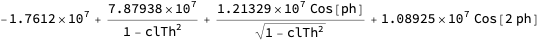

In [118]:
intthOnclTh = intth /. lTh -> ArcCos[clTh]

In [119]:
intthlTh = Integrate[intthOnclTh,{clTh,-1+0.02,1-0.02}]

8             7                     7
3.27547 10  + 3.32553 10  Cos[ph] + 2.13492 10  Cos[2 ph]

-Graphics-
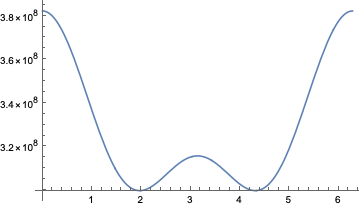

In [120]:
Plot[intthlTh,{ph,0,2*Pi}]

-10            8             7                     7
Piecewise[{{4.85899 10    (3.27547 10  + 3.32553 10  Cos[ph] + 2.13492 10  Cos[2 ph]), 
 
>     0 < ph < 2 Pi}}]
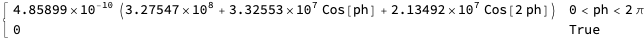

In [121]:
intthlThNorm=PDF[ProbabilityDistribution[intthlTh,{ph,0,2*Pi}, Method->"Normalize"],ph]

-Graphics-
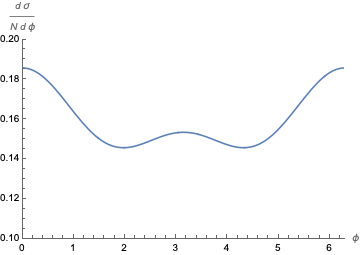

In [122]:
Plot[intthlThNorm,{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}, AxesLabel->{ToExpression["\\phi", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\phi)", TeXForm, HoldForm]}]

Let's make functions as a variable of $s$.

7       2                                  2
(6.91422 10  + svar ) (3 + Cos[2 th]) (-2 + 4 Csc[lTh] ) + 
 
                                        2
>   66521.4 svar (2 + Cos[2 ph]) Sin[th]  + 
 
>   729.501 Sqrt[svar] (8315.18 + svar) Cos[ph] Cot[lTh] Sin[2 th]
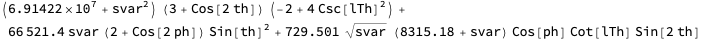

In [123]:
G1svar = ( (mZ^4+svar^2)*(3+Cos[2*th])*(4*Csc[lTh]^2-2) + 8*mZ^2*svar*Sin[th]^2*(2+Cos[2*ph]) + 8*mZ*Sqrt[svar]*(mZ^2+svar)*Cot[lTh]*Sin[2*th]*Cos[ph])

In [124]:
G2svar = 16 * Csc[lTh] * ( (mZ^4+svar^2)*Cos[th]*Cot[lTh] + mZ*Sqrt[svar]*(mZ^2+svar)*Sin[th]*Cos[ph] )

7       2
16 Csc[lTh] ((6.91422 10  + svar ) Cos[th] Cot[lTh] + 
 
>     91.1876 Sqrt[svar] (8315.18 + svar) Cos[ph] Sin[th])

7       2
0.0222311 Csc[lTh] ((6.91422 10  + svar ) Cos[th] Cot[lTh] + 
 
>      91.1876 Sqrt[svar] (8315.18 + svar) Cos[ph] Sin[th]) + 
 
                           7       2                                  2
>   0.00667151 ((6.91422 10  + svar ) (3 + Cos[2 th]) (-2 + 4 Csc[lTh] ) + 
 
                                           2
>      66521.4 svar (2 + Cos[2 ph]) Sin[th]  + 
 
>      729.501 Sqrt[svar] (8315.18 + svar) Cos[ph] Cot[lTh] Sin[2 th])
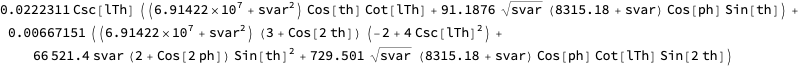

In [125]:
diffSsvar = (gZllRight^2 + gZllLeft^2)*(gZddRight^2+gZddLeft^2)*G1svar+(gZllRight^2 - gZllLeft^2)*(gZddRight^2-gZddLeft^2)*G2svar

In [126]:
intthsvar = Integrate[diffSsvar,{th,0,Pi}]

697.117 svar (2 + Cos[2 ph]) + 4.0544 Sqrt[svar] (8315.18 + svar) Cos[ph] Csc[lTh] + 
 
                         7       2                  2
>   0.0628775 (6.91422 10  + svar ) (-2 + 4 Csc[lTh] )

4                 7       2
0.0628775 (-2 + ---------) (6.91422 10  + svar ) + 
                        2
                1 - clTh
 
    4.0544 Sqrt[svar] (8315.18 + svar) Cos[ph]
>   ------------------------------------------ + 697.117 svar (2 + Cos[2 ph])
                              2
                 Sqrt[1 - clTh ]
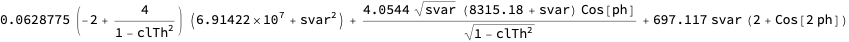

In [127]:
intthOnclThsvar = intthsvar /. lTh -> ArcCos[clTh]

In [128]:
intthlThsvar = Integrate[intthOnclThsvar,{clTh,-1+0.02,1-0.02}]

7                              2
6.28668 10  + 2732.7 svar + 0.909239 svar  + 
 
>   Sqrt[svar] (92404.9 + 11.1128 svar) Cos[ph] + 1366.35 svar Cos[2 ph]

-10            8             7                     7
Piecewise[{{4.85899 10    (3.27547 10  + 3.32553 10  Cos[ph] + 2.13492 10  Cos[2 ph]), 
 
>     0 < ph < 2 Pi}}]
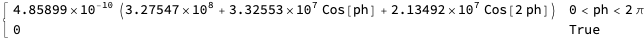

In [129]:
intthlThNorm125 = PDF[ProbabilityDistribution[intthlThsvar /. svar-> 125^2,{ph,0,2*Pi}, Method->"Normalize"],ph]

-9            7             6                     6
Piecewise[{{2.11133 10   (7.53812 10  + 6.00934 10  Cos[ph] + 3.41587 10  Cos[2 ph]), 
 
>     0 < ph < 2 Pi}}]
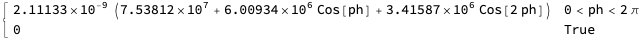

In [130]:
intthlThNorm50 = PDF[ProbabilityDistribution[intthlThsvar /. svar-> 50^2,{ph,0,2*Pi}, Method->"Normalize"],ph]

-11            9             8                    7
Piecewise[{{9.78237 10    (1.62696 10  + 1.07383 10  Cos[ph] + 5.4654 10  Cos[2 ph]), 
 
>     0 < ph < 2 Pi}}]
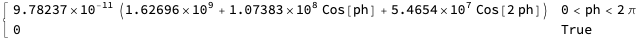

In [131]:
intthlThNorm200 = PDF[ProbabilityDistribution[intthlThsvar /. svar-> 200^2,{ph,0,2*Pi}, Method->"Normalize"],ph]

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]], Directive[Opacity[1.], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[1.6]]}, 
 
>     {sqrt(s)=50 GeV, sqrt(s)=125 GeV, sqrt(s)=200 GeV}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
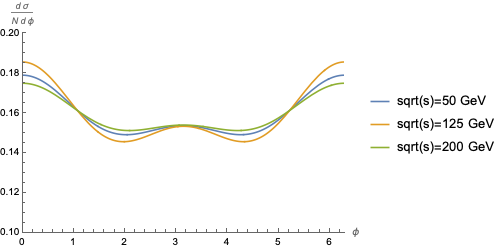

In [132]:
Plot[{intthlThNorm50,intthlThNorm125,intthlThNorm200},{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}, AxesLabel->{ToExpression["\\phi", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\phi)", TeXForm, HoldForm]},PlotLegends->{"sqrt(s)=50 GeV","sqrt(s)=125 GeV","sqrt(s)=200 GeV"}]

Distribution for up quarks

In [133]:
gZuuLeft = 0.30282212 * (-0.5-2/3*0.222) / Sqrt[0.222] / 0.882

-0.472191

In [134]:
gZuuRight = 0.30282212 * (-2/3*0.222) / Sqrt[0.222] / 0.882

-0.107846

8                              8
0.0502726 Csc[lTh] (3.13283 10  Cos[th] Cot[lTh] + 2.72881 10  Cos[ph] Sin[th]) + 
 
                         8                                 2
>   0.0157662 (3.13283 10  (3 + Cos[2 th]) (-2 + 4 Csc[lTh] ) + 
 
                9                        2             9
>      1.0394 10  (2 + Cos[2 ph]) Sin[th]  + 2.18305 10  Cos[ph] Cot[lTh] Sin[2 th])
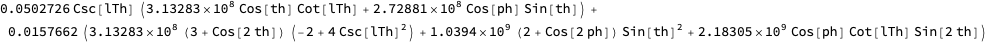

In [135]:
diffSuu = (gZllRight^2 + gZllLeft^2)*(gZuuRight^2+gZuuLeft^2)*G1+(gZllRight^2 - gZllLeft^2)*(gZuuRight^2-gZuuLeft^2)*G2

In [136]:
intthuu = Integrate[diffSuu,{th,0,Pi}]

7             7                       7
-4.16209 10  + 2.57412 10  Cos[2 ph] + 2.74369 10  Cos[ph] Csc[lTh] + 
 
              8         2
>   1.86207 10  Csc[lTh]

8             7
           7   1.86207 10    2.74369 10  Cos[ph]             7
-4.16209 10  + ----------- + ------------------- + 2.57412 10  Cos[2 ph]
                        2                   2
                1 - clTh       Sqrt[1 - clTh ]
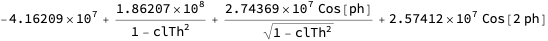

In [137]:
intthOnclThuu = intthuu /. lTh -> ArcCos[clTh]

In [138]:
intthlThuu = Integrate[intthOnclThuu,{clTh,-1+0.02,1-0.02}]

8             7                     7
7.74065 10  + 7.52023 10  Cos[ph] + 5.04528 10  Cos[2 ph]

-Graphics-
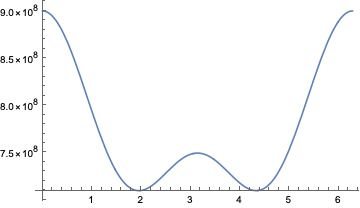

In [139]:
Plot[intthlThuu,{ph,0,2*Pi}]

-10            8             7                     7
Piecewise[{{2.05609 10    (7.74065 10  + 7.52023 10  Cos[ph] + 5.04528 10  Cos[2 ph]), 
 
>     0 < ph < 2 Pi}}]
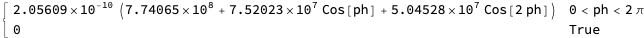

In [140]:
intthlThNormuu=PDF[ProbabilityDistribution[intthlThuu,{ph,0,2*Pi}, Method->"Normalize"],ph]

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]]}, {dd t-channel, uu t-channel}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
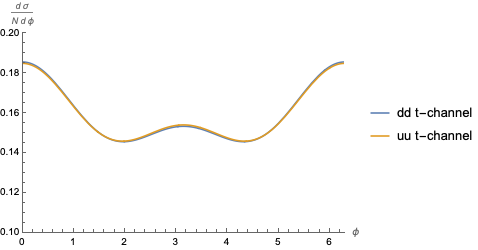

In [141]:
Plot[{intthlThNorm,intthlThNormuu},{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}, AxesLabel->{ToExpression["\\phi", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\phi)", TeXForm, HoldForm]},PlotLegends->{"dd t-channel","uu t-channel"}]

Integrate over $\theta$ and $\phi$ to get $\cos \Theta$ distribution.

In [16]:
intthph = Integrate[intth,{ph,0,2*Pi}]

8             8         2
-1.10659 10  + 4.95076 10  Csc[lTh]

-Graphics-
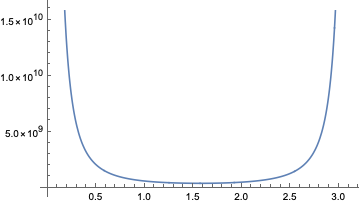

In [17]:
Plot[intthph,{lTh,0,Pi}]

8
           8   4.95076 10
-1.10659 10  + -----------
                        2
                1 - clTh
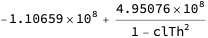

In [18]:
intthphonclTh = intthph /. lTh -> ArcCos[clTh]

-Graphics-
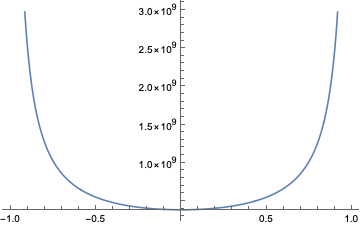

In [19]:
Plot[intthphonclTh,{clTh,-1,1}]

Limit $\cos \Theta$ normalization range to $-1+0.03$ and $1-0.03$ due to singularity at $\cos \Theta=-1$ and $\cos \Theta=1$

8
                    -10             8   4.95076 10
Piecewise[{{5.385 10    (-1.10659 10  + -----------), -0.97 < clTh < 0.97}}]
                                                 2
                                         1 - clTh
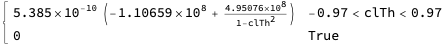

In [20]:
intthphonclThNorm=PDF[ProbabilityDistribution[intthphonclTh,{clTh,-1+0.03,1-0.03}, Method->"Normalize"],clTh]

-Graphics-
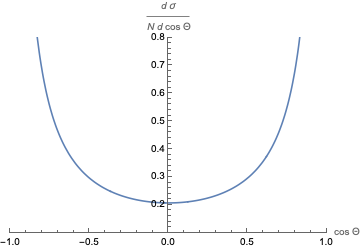

In [21]:
Plot[intthphonclThNorm, {clTh,-1,1}, PlotRange->{{-1,1},{0.1,0.8}},AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\Theta)", TeXForm, HoldForm]}]

Integrate over $\phi$ and $\Theta$ to get $\cos \theta$ distribution.

Limit $\cos \Theta$ integration to range of $-1 + 0.03$ to $1 - 0.03$ due to singularity at $\cos \Theta=0$ and $\cos \Theta=\pi$.

7           7                                       8         2
-7.87938 10  + 4.376 10  Cos[th] Cot[lTh] Csc[lTh] + 1.57588 10  Csc[lTh]  + 
 
                          7             7         2              7        2
>   Cos[2 th] (-2.62646 10  + 5.25292 10  Csc[lTh] ) + 8.71396 10  Sin[th]
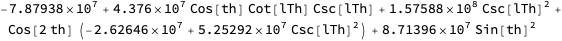

In [22]:
intph = Integrate[diffS,{ph,0,2*Pi}]

8           7
           7   1.57588 10    4.376 10  clTh Cos[th]
-7.87938 10  + ----------- + ---------------------- + 
                        2                  2
                1 - clTh           1 - clTh
 
                              7
                7   5.25292 10                         7        2
>   (-2.62646 10  + -----------) Cos[2 th] + 8.71396 10  Sin[th]
                             2
                     1 - clTh
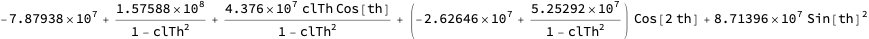

In [23]:
intphOnclTh = intph /. lTh -> ArcCos[clTh]

In [24]:
intphlTh = Integrate[intphOnclTh,{clTh,-1+0.001,1-0.001}]

9                                   8
1.12735 10  - 0.000437438 Cos[th] + 2.59714 10  Cos[2. th]

-Graphics-
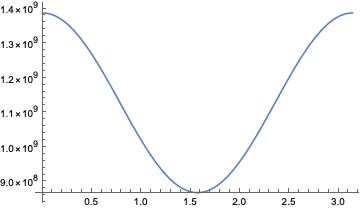

In [25]:
Plot[intphlTh/.s->125^2,{th,0,Pi}]

In [26]:
intphlThOncth = intphlTh /. th -> ArcCos[cth]

9                               8
1.12735 10  - 0.000437438 cth + 2.59714 10  Cos[2. ArcCos[cth]]

-Graphics-
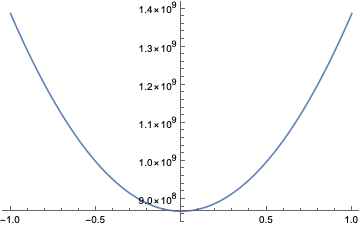

In [27]:
Plot[intphlThOncth,{cth,-1,1}]

-10            9
Piecewise[{{4.80409 10    (1.12735 10  - 0.000437438 cth + 
 
                   8
>        2.59714 10  Cos[2. ArcCos[cth]]), -1 < cth < 1}}]
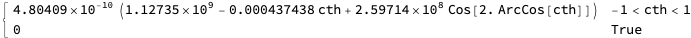

In [28]:
intphlThOncthNorm=PDF[ProbabilityDistribution[intphlThOncth,{cth,-1,1}, Method->"Normalize"],cth]

-Graphics-
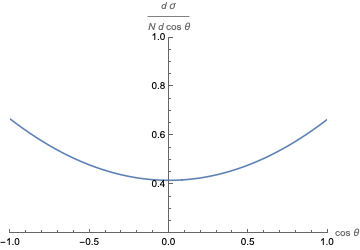

In [29]:
Plot[intphlThOncthNorm, {cth,-1,1}, PlotRange->{{-1,1},{0.2,1.0}},AxesLabel->{ToExpression["\\cos\\theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\theta)", TeXForm, HoldForm]}]

For gluon-gluon fusion $H\rightarrow Z \gamma$, the production angular distribution is
$$ \frac{1}{N^\prime}\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi} = 1 + \cos^2 \theta$$

2
1 + Cos[th]
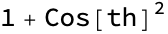

In [30]:
sigDiffS=1+Cos[th]^2

1
----
2 Pi
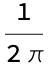

In [35]:
sigph=1/2/Pi

-Graphics-
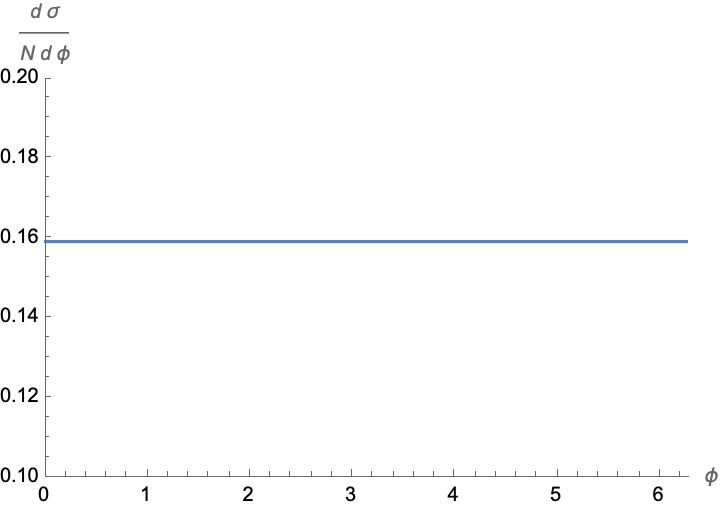

In [36]:
Plot[sigph,{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}, AxesLabel->{ToExpression["\\phi", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\phi)", TeXForm, HoldForm]}]

In [40]:
sigclTh=1/2

1
-
2

-Graphics-
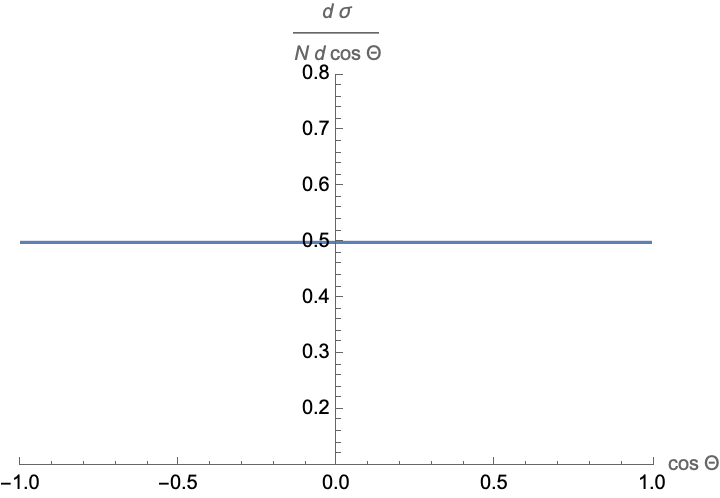

In [41]:
Plot[sigclTh, {clTh,-1,1}, PlotRange->{{-1,1},{0.1,0.8}},AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\Theta)", TeXForm, HoldForm]}]

2
1 + cth
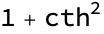

In [42]:
sigcth = sigDiffS /. th -> ArcCos[cth]

-Graphics-
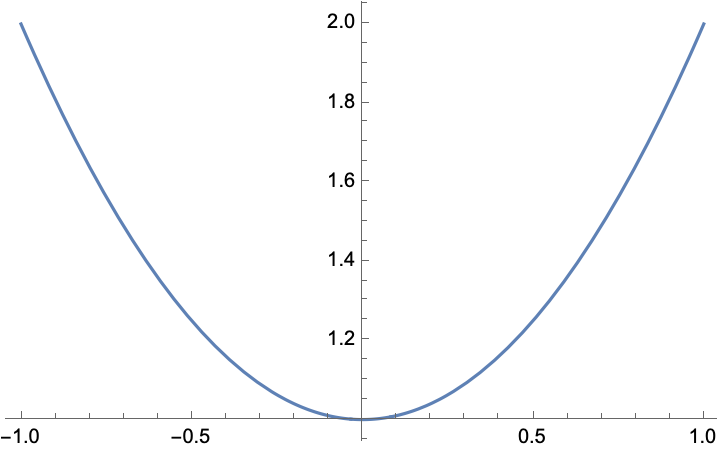

In [43]:
Plot[sigcth,{cth,-1,1}]

2
            3 (1 + cth )
Piecewise[{{------------, -1 < cth < 1}}]
                 8
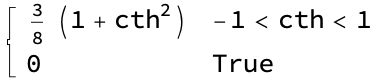

In [44]:
sigcthNorm=PDF[ProbabilityDistribution[sigcth,{cth,-1,1}, Method->"Normalize"],cth]

-Graphics-
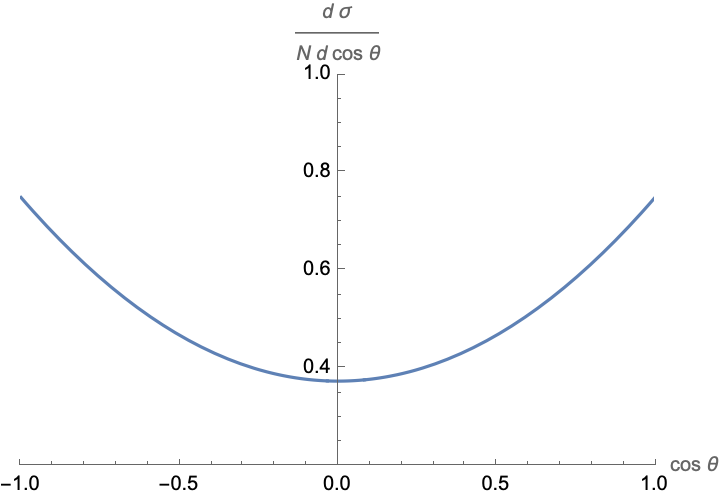

In [45]:
Plot[sigcthNorm, {cth,-1,1}, PlotRange->{{-1,1},{0.2,1.0}},AxesLabel->{ToExpression["\\cos\\theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\theta)", TeXForm, HoldForm]}]

Below are summary plots of the above calculations.

-Graphics-
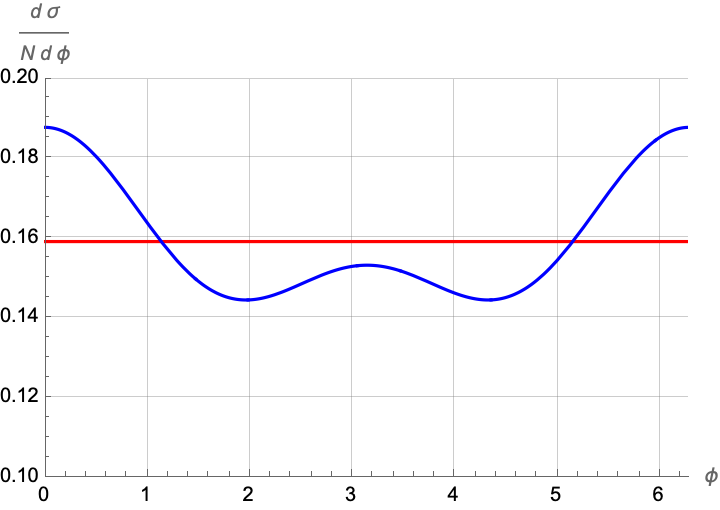

In [55]:
Plot[{sigph,intthlThNorm},{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}, AxesLabel->{ToExpression["\\phi", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\phi)", TeXForm, HoldForm]}, PlotStyle->{Red, Blue},GridLines->Automatic]

-Graphics-
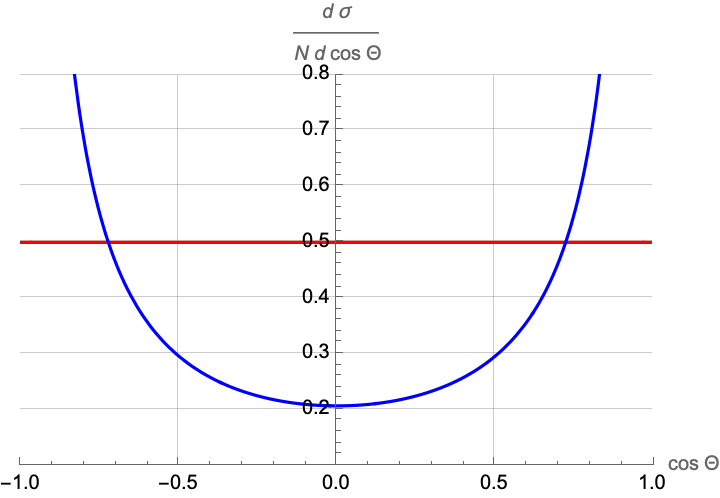

In [54]:
Plot[{sigclTh,intthphonclThNorm}, {clTh,-1,1}, PlotRange->{{-1,1},{0.1,0.8}},AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\Theta)", TeXForm, HoldForm]}, PlotStyle->{Red, Blue},GridLines->Automatic]

-Graphics-
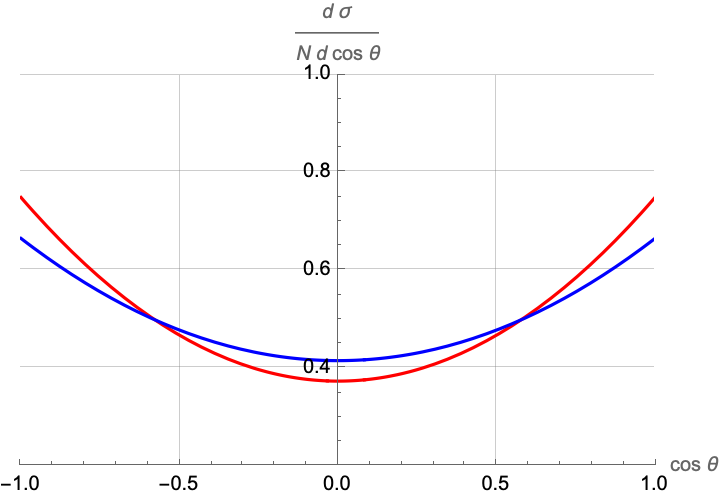

In [52]:
Plot[{sigcthNorm,intphlThOncthNorm}, {cth,-1,1}, PlotRange->{{-1,1},{0.2,1.0}},AxesLabel->{ToExpression["\\cos\\theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\theta)", TeXForm, HoldForm]},PlotStyle->{Red, Blue}, GridLines->Automatic]

In [375]:
intphlTh = Integrate[intph,{lTh,0+0.4,Pi-0.4}]

8             -6                     8                       8        2
5.60956 10  + 6.25754 10   Cos[th] + 1.86985 10  Cos[2 th] + 2.04045 10  Sin[th]

-Graphics-
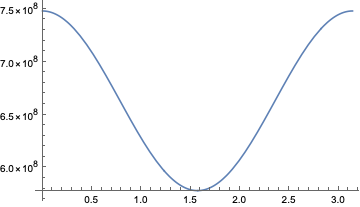

In [376]:
Plot[intphlTh,{th,0,Pi}]

In [377]:
intphlThOncth = intphlTh /. th -> ArcCos[cth]

8             -6                 8         2              8
5.60956 10  + 6.25754 10   cth + 2.04045 10  (1 - cth ) + 1.86985 10  Cos[2 ArcCos[cth]]

-Graphics-
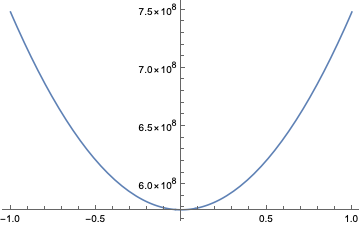

In [378]:
Plot[intphlThOncth,{cth,-1,1}]

-10            8             -6                 8         2
Piecewise[{{7.87826 10    (5.60956 10  + 6.25754 10   cth + 2.04045 10  (1 - cth ) + 
 
                   8
>        1.86985 10  Cos[2 ArcCos[cth]]), -1 < cth < 1}}]
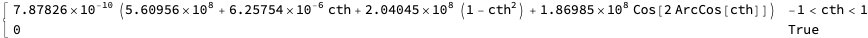

In [379]:
intphlThOncthNorm=PDF[ProbabilityDistribution[intphlThOncth,{cth,-1,1}, Method->"Normalize"],cth]

-Graphics-
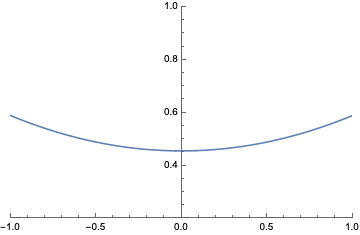

In [380]:
Plot[intphlThOncthNorm, {cth,-1,1}, PlotRange->{{-1,1},{0.2,1.0}}]

In [389]:
intthlTh = Integrate[intth,{lTh,0.4,Pi-0.4}]

8             7                     7
3.31489 10  + 3.87276 10  Cos[ph] + 2.55057 10  Cos[2 ph]

-Graphics-
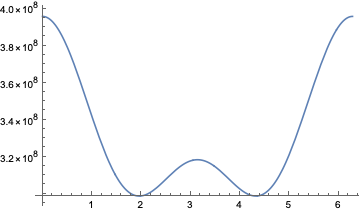

In [387]:
Plot[intthlTh,{ph,0,2*Pi}]

-10            8             7                     7
Piecewise[{{4.80121 10    (3.31489 10  + 3.87276 10  Cos[ph] + 2.55057 10  Cos[2 ph]), 
 
>     0 < ph < 2 Pi}}]
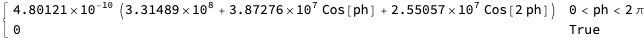

In [363]:
intthlThNorm=PDF[ProbabilityDistribution[intthlTh,{ph,0,2*Pi}, Method->"Normalize"],ph]

-Graphics-
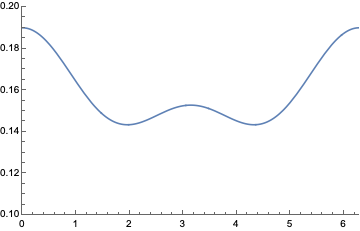

In [364]:
Plot[intthlThNorm,{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}]

-10             8             8         2
Piecewise[{{4.80121 10    (-1.10659 10  + 4.95076 10  Csc[lTh] ), 0.4 < lTh < 2.74159}}]
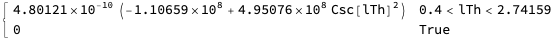

In [249]:
intthphNorm=PDF[ProbabilityDistribution[intthph,{lTh,0.4,Pi-0.4}, Method->"Normalize"],lTh]

-Graphics-
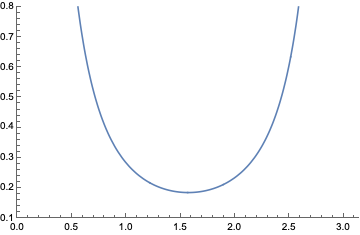

In [250]:
Plot[intthphNorm,{lTh,0,Pi}, PlotRange->{{0,Pi},{0.1,0.8}}]

-Graphics-
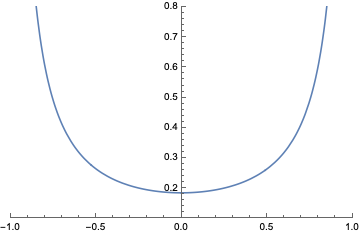

In [251]:
ParametricPlot[{Cos[lTh],intthphNorm},{lTh,0,2*Pi}, PlotRange->{{-1,1},{0.1,0.8}}, AspectRatio -> 1/GoldenRatio]

-10            8             -6                     8
Piecewise[{{4.80121 10    (5.60956 10  + 6.25754 10   Cos[th] + 1.86985 10  Cos[2 th] + 
 
                   8        2
>        2.04045 10  Sin[th] ), 0 < th < Pi}}]
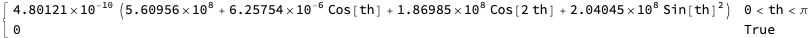

In [323]:
intphlThNorm=PDF[ProbabilityDistribution[intphlTh,{th,0,Pi}, Method->"Normalize"],th]

-Graphics-
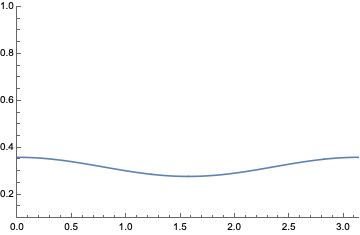

In [324]:
Plot[intphlThNorm,{th,0,Pi}, PlotRange->{{0,Pi},{0.1,1.0}}]

-Graphics-
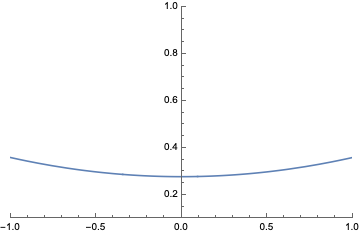

In [325]:
ParametricPlot[{Cos[th],intphlThNorm},{th,0,2*Pi}, PlotRange->{{-1,1},{0.1,1.0}}, AspectRatio -> 1/GoldenRatio]

-Graphics-
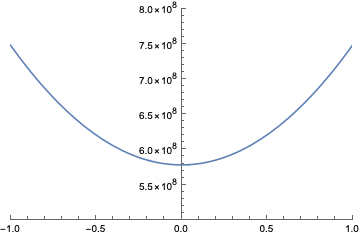

In [293]:
ParametricPlot[{Cos[th],intphlTh},{th,0,Pi}, PlotRange->{{-1,1},{5*10^8,8*10^8}}, AspectRatio -> 1/GoldenRatio]

8                                 2
Inactive[Integrate][3.13283 10  (3 + Cos[2 th]) (-2 + 4 Csc[lTh] ) + 
 
              9                        2             9
>    1.0394 10  (2 + Cos[2 ph]) Sin[th]  + 2.18305 10  Cos[ph] Cot[lTh] Sin[2 th], lTh]
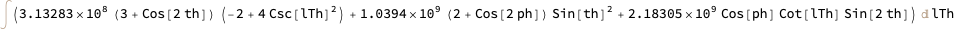

In [36]:
intlTh = Inactive[Integrate][G1,{lTh,0,Pi}]

8           2
                     6.26566 10  (1. + clTh ) (3. + Cos[2 th])
Inactive[Integrate][(----------------------------------------- - 
                                              2
                                    -1. + clTh
 
                 9
       4.36609 10  clTh Cos[ph] Cos[th] Sin[th]            9                        2
>      ---------------------------------------- - 1.0394 10  (2 + Cos[2 ph]) Sin[th] ) / 
                                2
                   Sqrt[1 - clTh ]
 
                  2
>    Sqrt[1 - clTh ], clTh, Assumptions -> -1 <= clTh <= 1 && 0 <= lTh <= Pi]
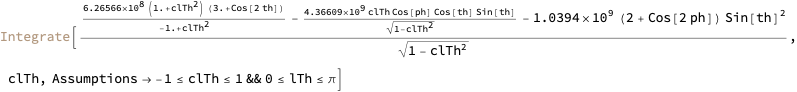

In [37]:
intlThResult=IntegrateChangeVariables[intlTh, clTh, clTh == Cos[lTh]]

9                       2
1.25313 10  clTh Sqrt[1. - 1. clTh ] (3. + 1. Cos[2. th])
--------------------------------------------------------- - 
                                 2
                       -1. + clTh
 
              8
>   5.19699 10  ArcSin[clTh] (-1.6169 + 
 
>      Cos[(2. + 0. I) ph] (1. - 1. Cos[(2. + 0. I) th]) - 3.20563 Cos[(2. + 0. I) th])\
 
                 9                         2
>    + 1.09152 10  Cos[ph] Log[1. - 1. clTh ] Sin[2. th]
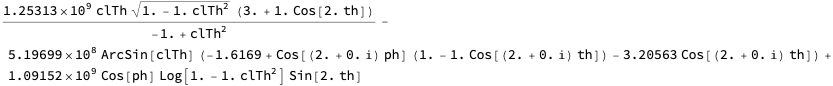

In [38]:
intlThEq=Activate[intlThResult]

-Graphics-
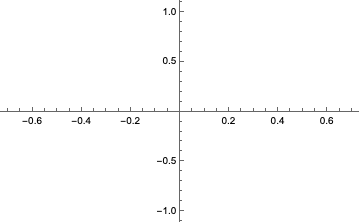

In [27]:
Plot[intlThEq,{clTh,-0.7,0.7}]

9
-1.22831 10  (3. + 1. Cos[2. th]) - 
 
              8
>   4.02973 10  (-1.6169 + Cos[(2. + 0. I) ph] (1. - 1. Cos[(2. + 0. I) th]) - 
 
                                                8
>      3.20563 Cos[(2. + 0. I) th]) - 7.34972 10  Cos[ph] Sin[2. th]
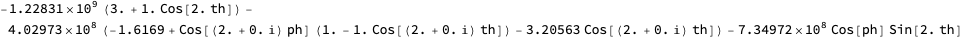

In [28]:
intlThEq /. clTh->0.7